### How to make predictions with the mortality model?

In [1]:
from train_mortality_model import *
import pickle

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
with open("adjutorium_mortality","rb") as f:
    
    death_model     = pickle.load(f)

    
with open("adjutorium_discharge","rb") as f:
    
    discharge_model  = pickle.load(f)
    
with open("adjutorium_icu","rb") as f:
    
    ICU_model  = pickle.load(f)

In [3]:
death_model.feature_set

['Age',
 'Gender',
 'Obesity',
 'Pregnancy',
 'Chronic Respiratory',
 'Asthma',
 'Chronic Heart',
 'Chronic Renal',
 'Chronic Liver',
 'Chronic Neurological',
 'Diabetes',
 'Immunosuppression Treatment',
 'Immunosuppression Disease',
 'Other Comorbidities',
 'Hypertension']

In [4]:
# exemplary patient

X               = np.array([80, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
mortality_curve = death_model.predict(X)[0]
discharge_curve = discharge_model.predict(X)[0]
icu_curve       = ICU_model.predict(X)[0]

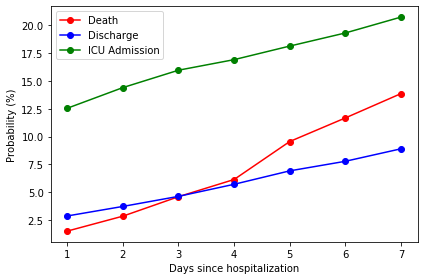

In [10]:
plt.plot(list(range(1,8)), np.array(mortality_curve) * 100, marker="o", color="r", label="Death")
plt.plot(list(range(1,8)), np.array(discharge_curve) * 100, marker="o", color="b", label="Discharge")
plt.plot(list(range(1,8)), np.array(icu_curve)[:7] * 100, marker="o", color="g", label="ICU Admission")


plt.legend()
plt.xlabel("Days since hospitalization")
plt.ylabel("Probability (%)")

plt.tight_layout()
plt.savefig("ICU_curve.png", dpi=5200)